In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Salary Data.csv to Salary Data.csv


In [ ]:
df = pd.read_csv("Salary Data.csv")

In [ ]:
print("Dataset Info:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None

First 5 rows:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's   

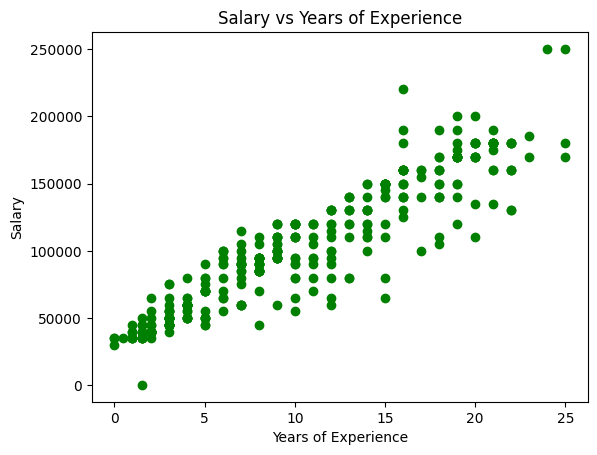

In [ ]:
plt.scatter(df["Years of Experience"], df["Salary"], color='green')
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [ ]:
X = df[["Years of Experience"]]   # Feature
Y = df["Salary"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
# Drop rows with missing values
X_train = X_train.dropna()
Y_train = Y_train[X_train.index]   # keep Y aligned with X

# Train Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)


LinearRegression()

In [ ]:
print("\nTraining Accuracy (R²):", lr.score(X_train, Y_train))
print("Testing Accuracy (R²):", lr.score(X_test, Y_test))



Training Accuracy (R²): 0.8598992995419
Testing Accuracy (R²): 0.892606626657628


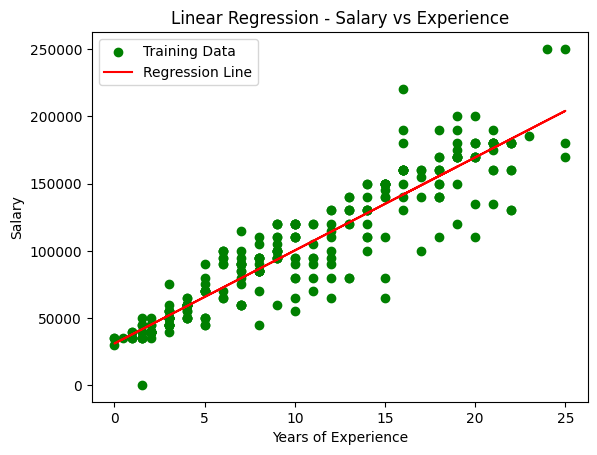

In [ ]:
plt.scatter(X_train, Y_train, color='green', label="Training Data")
plt.plot(X_train, lr.predict(X_train), color='red', label="Regression Line")
plt.title("Linear Regression - Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [ ]:
X_test_df = pd.DataFrame(X_test, columns=["YearsExperience"])

Y_pred = lr.predict(X_test)

print("\nPredicted vs Actual Salaries:")
result = pd.DataFrame({
    'YearsExperience': X_test_df["YearsExperience"],
    'Actual Salary': Y_test,
    'Predicted Salary': Y_pred
})

print(result)


Predicted vs Actual Salaries:
     YearsExperience  Actual Salary  Predicted Salary
122              NaN        50000.0      65710.329280
296              NaN       130000.0     114105.811181
312              NaN       150000.0     134846.731996
210              NaN       110000.0      93364.890366
204              NaN        90000.0      79537.609823
..               ...            ...               ...
173              NaN       140000.0     141760.372267
56               NaN        65000.0      44969.408465
8                NaN        45000.0      38055.768194
280              NaN        50000.0      51883.048737
299              NaN       100000.0      93364.890366

[75 rows x 3 columns]
